In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("E:/NTI/User_Data.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=df.iloc[:,2:4]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
y=df.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
accuracy_score(y_test,y_pred)

0.8125

In [10]:
# perform 10-fold cross validation
score_list=[]
for k in range(1,50 ,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    score_list.append(scores.mean().round(2))
    print("k=", k,"  " ,'score=',scores.mean().round(2))
 

k= 1    score= 0.76
k= 3    score= 0.78
k= 5    score= 0.81
k= 7    score= 0.81
k= 9    score= 0.81
k= 11    score= 0.82
k= 13    score= 0.82
k= 15    score= 0.82
k= 17    score= 0.8
k= 19    score= 0.81
k= 21    score= 0.8
k= 23    score= 0.79
k= 25    score= 0.8
k= 27    score= 0.8
k= 29    score= 0.8
k= 31    score= 0.8
k= 33    score= 0.79
k= 35    score= 0.79
k= 37    score= 0.79
k= 39    score= 0.79
k= 41    score= 0.8
k= 43    score= 0.78
k= 45    score= 0.79
k= 47    score= 0.79
k= 49    score= 0.79


In [11]:
for j in range(1,50 ,2):
    knn = KNeighborsClassifier(n_neighbors=j) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(j, "      ",accuracy_score(y_test,y_pred)*100)


1        81.25
3        80.0
5        82.5
7        81.25
9        80.0
11        80.0
13        75.0
15        77.5
17        77.5
19        76.25
21        77.5
23        76.25
25        77.5
27        78.75
29        80.0
31        80.0
33        78.75
35        80.0
37        75.0
39        77.5
41        76.25
43        76.25
45        75.0
47        75.0
49        75.0


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


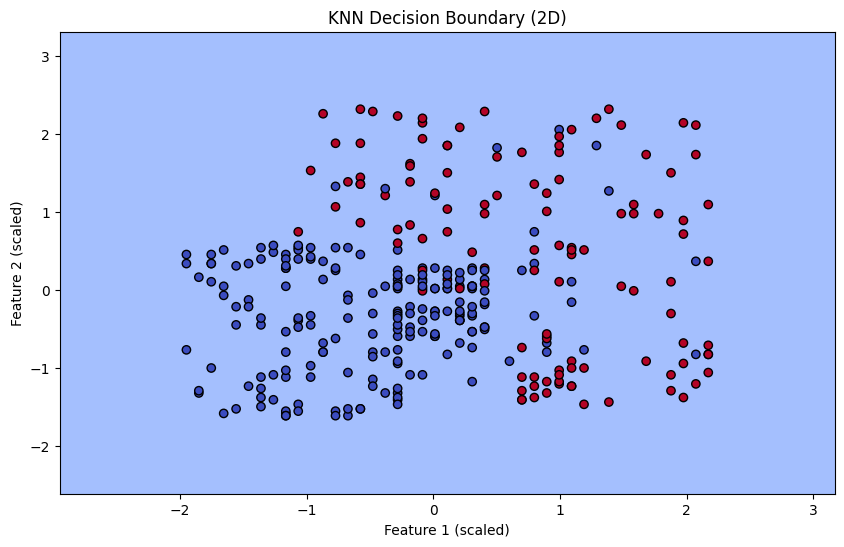

In [12]:
h = 0.02  

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('KNN Decision Boundary (2D)')
plt.show()

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


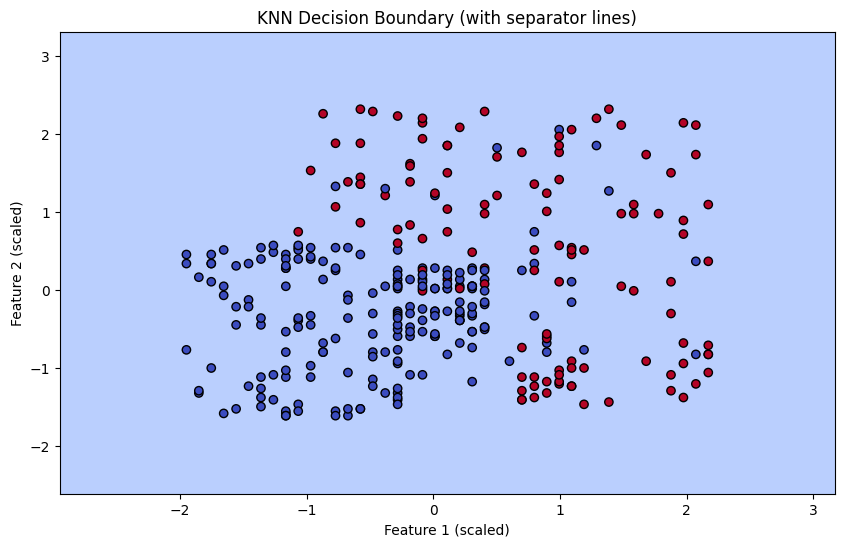

In [13]:
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# الرسم
plt.figure(figsize=(10, 6))

# تظليل المناطق
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# رسم خطوط الفاصل (Decision Boundaries)
plt.contour(xx, yy, Z, colors='k', linewidths=1)

# رسم البيانات الفعلية
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train,
            cmap=plt.cm.coolwarm, edgecolors='k')

plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('KNN Decision Boundary (with separator lines)')
plt.show()


(400, 5)


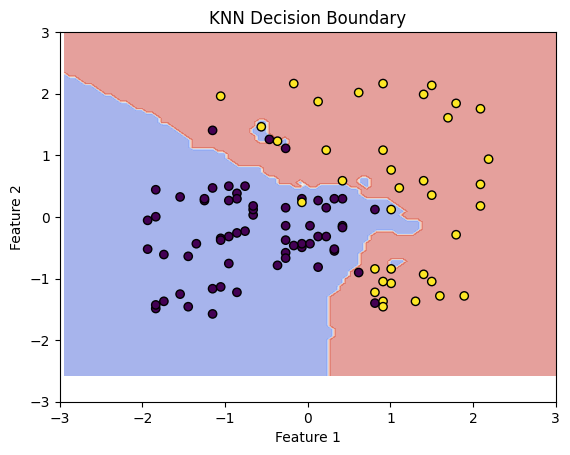

In [15]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv("E:/NTI/User_Data.csv")
print(df.shape)
df.head()
X=df.iloc[:,2:4]
X
y=df.iloc[:,4]
y


# تقسيم وتقييس البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج التصنيف
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaled, y_train)

# عرض حدود القرار (Decision Boundary)
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_test_scaled,
    response_method="predict",
    xlabel="Feature 1", ylabel="Feature 2",
    alpha=0.5,
    cmap=plt.cm.coolwarm
)

# رسم نقاط البيانات
disp.ax_.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k')

plt.title("KNN Decision Boundary")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()


(400, 5)


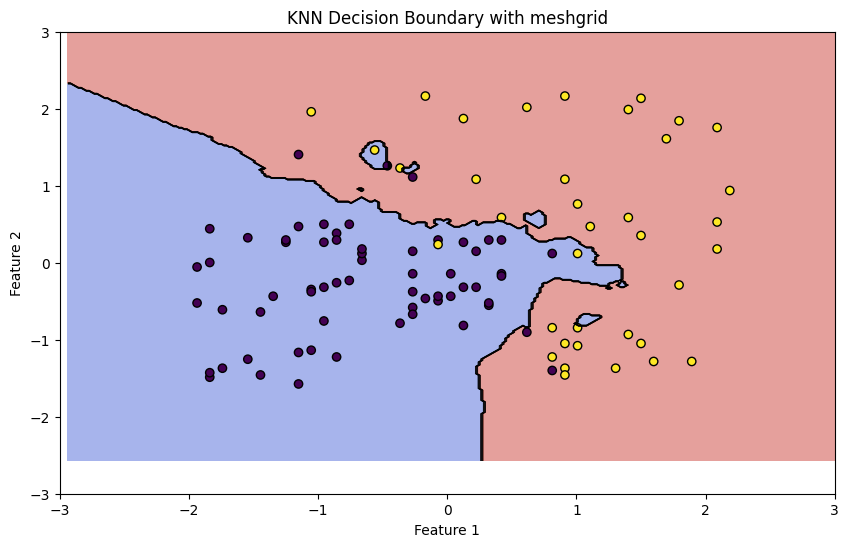

In [16]:

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary with meshgrid")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN on Iris')
plt.show()
